0.6830370404851687


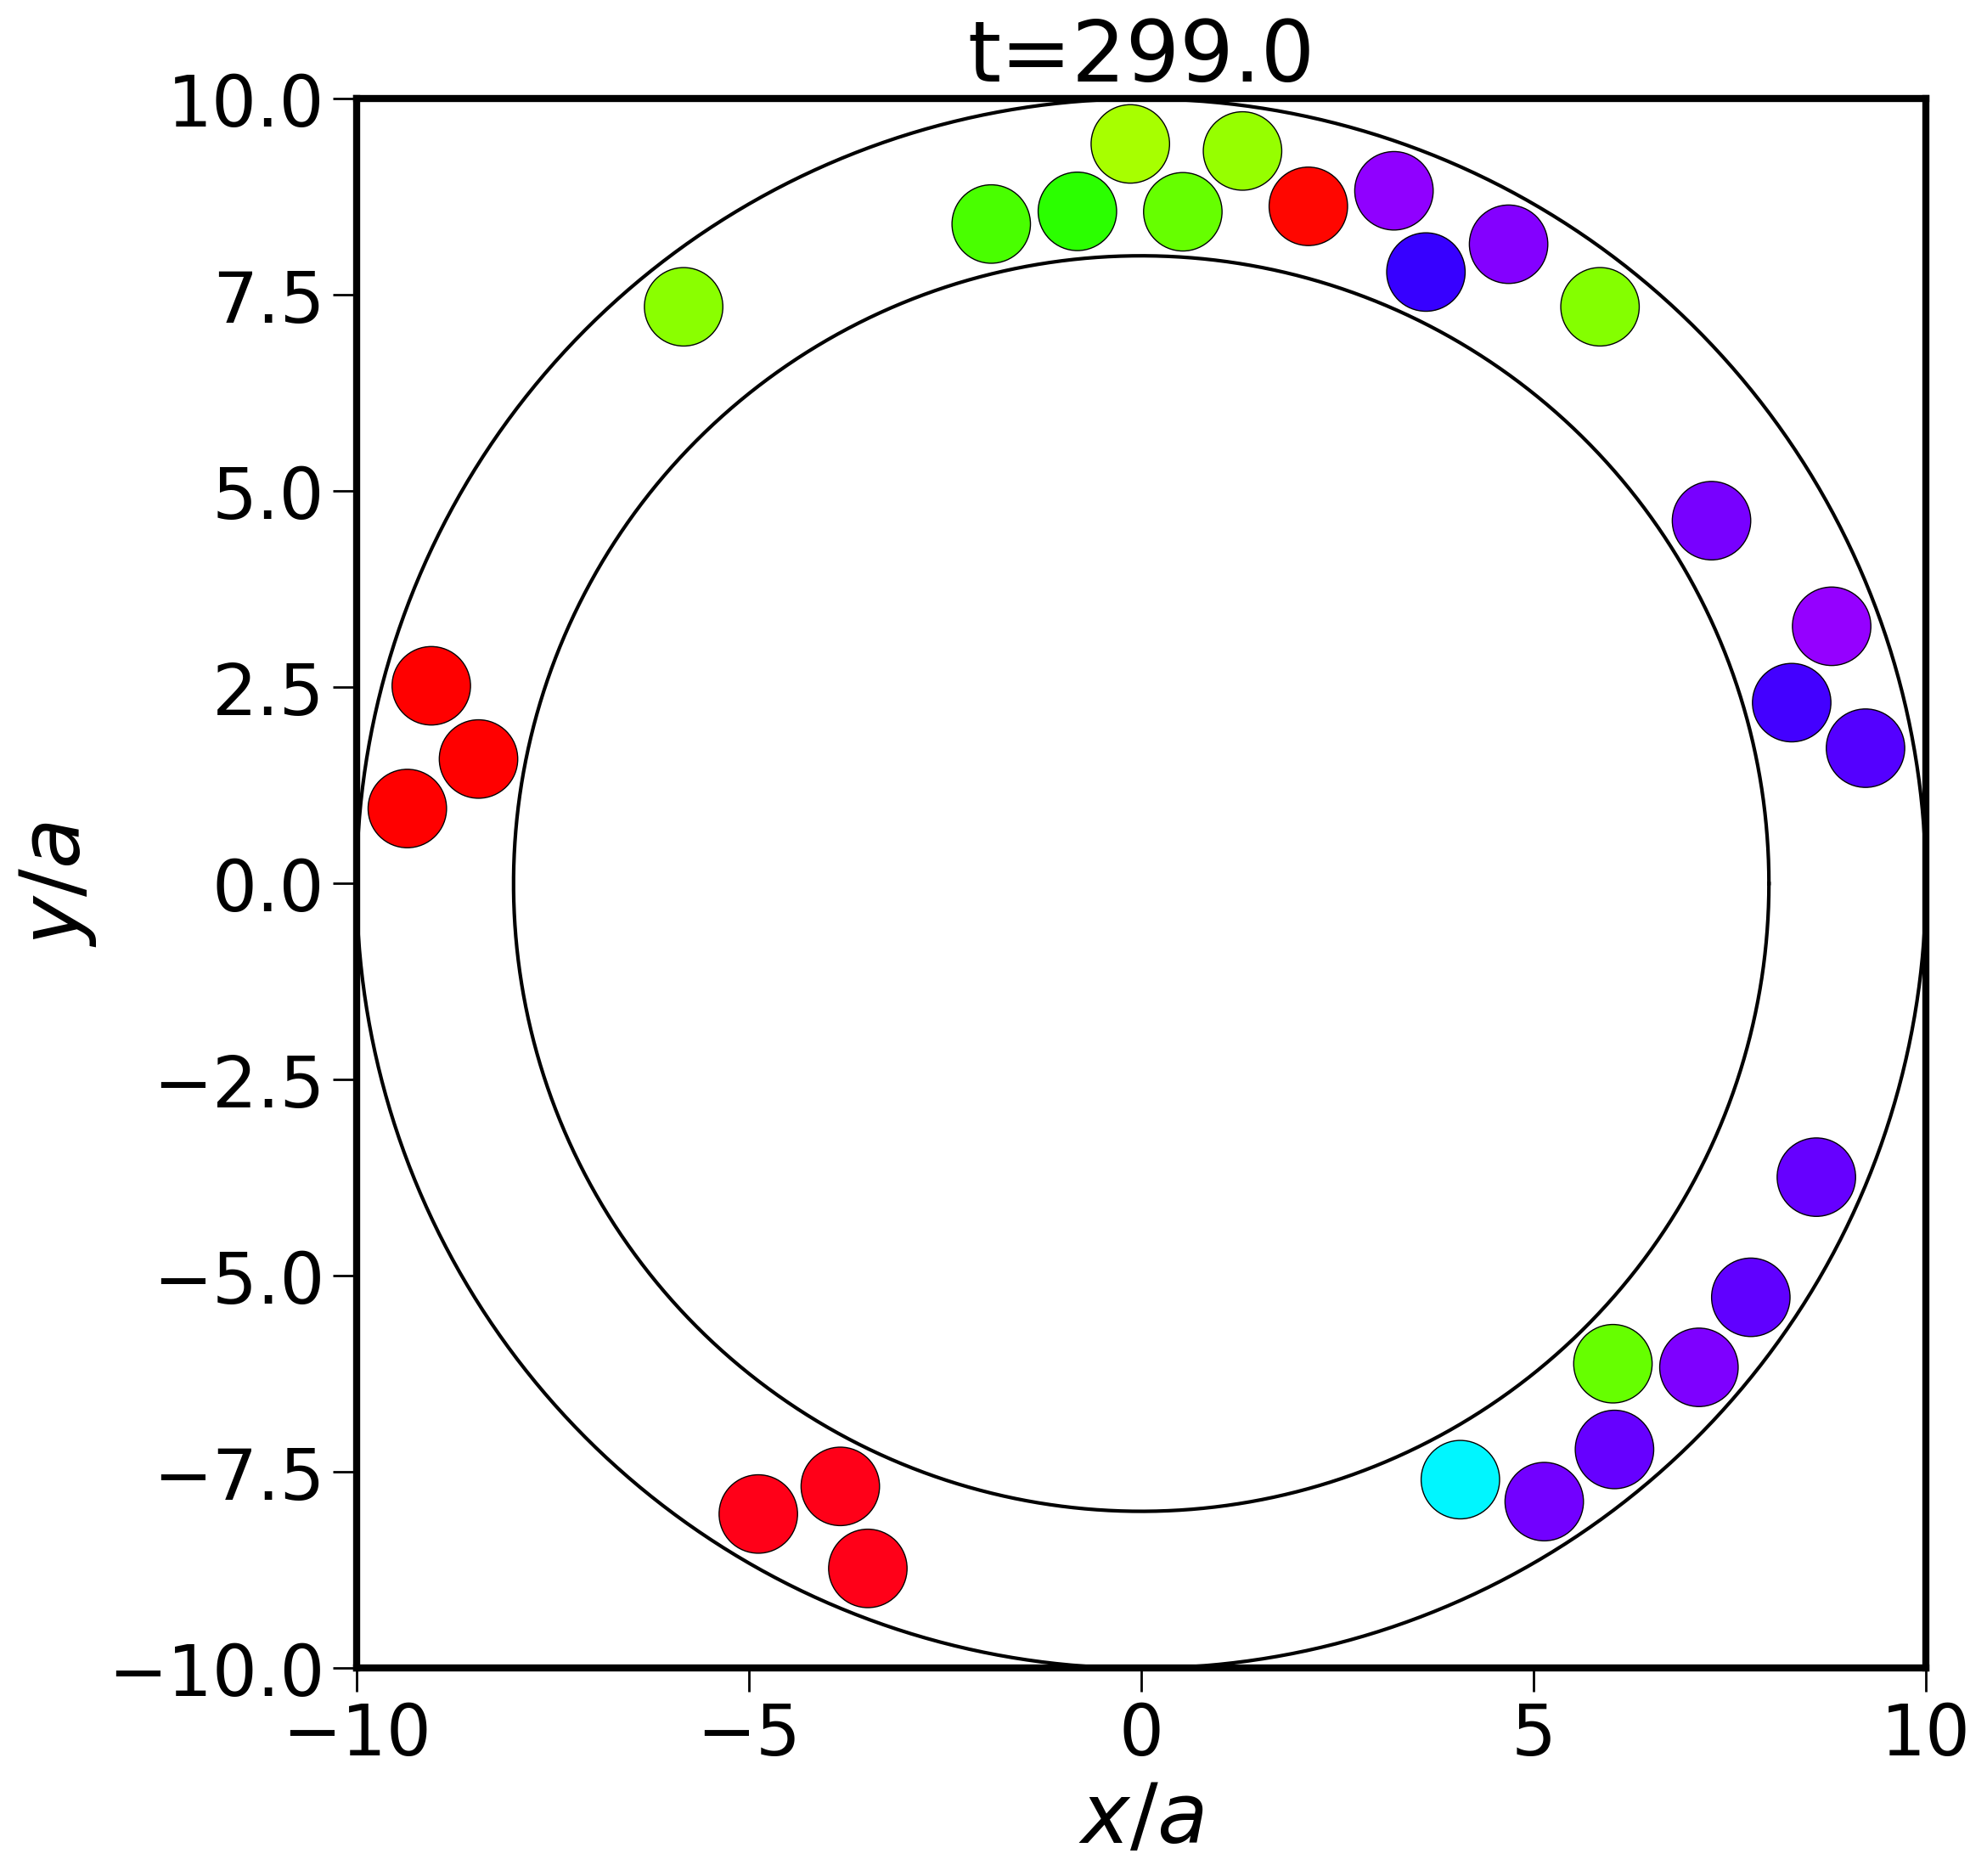

In [4]:
%matplotlib inline
import math
import matplotlib
%config InlineBackend.figure_format = 'retina'
import matplotlib.cm as cm  # colormap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
# plt.rcParams["text.usetex"] =True
plt.rcParams["font.size"] = 30
#from matplotlib import patches
from matplotlib.collections import EllipseCollection
from matplotlib.patches import Circle

cmap = matplotlib.colormaps["Greys"]
# Np=12800#8192#2048#
def circleplot(R):
    t = np.linspace(0,np.pi*2,1000)
    x = R * np.cos(t)
    y = R * np.sin(t)
    plt.plot(x,y,"-",color="k",markersize=20)

def make_animation(moji,moji2,lo,L,tau,v0,Mg,filenum,vminmax,Ms,rs):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(1,1,1)
    ax.set_aspect('equal')
    title=plt.title("t")
    plt.xlim(-L, L)
    plt.ylim(-L, L)
    #cbのために適当なマップをダス:;
    # Normalize~mappable~colorbar(mappable)でも可。(粒子数が多いときはこちらの方が良いかも?);
    # アニメーション内部でプロットしたい場合は(update_normal(mappable)？使う前に検討);
    a= np.loadtxt("./{}R{:.1f}rs{:.1f}_animelo{:.2f}tau{:.3f}Ms{:.3f}v0{:.1f}/tyokkei.dat".format(moji,L,rs,lo,tau,Ms,v0), comments='#', unpack=True)
    
    x, y,vx,vy = np.loadtxt("./{}R{:.1f}rs{:.1f}_animelo{:.2f}tau{:.3f}Ms{:.3f}v0{:.1f}/tyouwaenn_m{:.3f}_t{:n}.dat".format(moji,L,rs,lo,tau,Ms,v0,Mg,150), comments='#', unpack=True)
    lz=(x*vy-y*vx)/np.sqrt(x*x+y*y)
    lzmax=np.amax(np.abs(lz))
    print(lzmax)

    circleplot(L)
    circleplot(rs)
    th=np.zeros_like(x)
    # a=np.ones_like(x)
    p = EllipseCollection(a[1:],a[1:],th,units="xy", cmap=matplotlib.cm.hsv,transOffset=ax.transData, alpha=1.0,fc='g',ec="k",lw=0.5)
    p.set_clim(vmin=-vminmax, vmax=vminmax) 
    #animated=true?
    ax.add_collection(p)
    p.set_array(lz)
    # C=plt.colorbar(p,label=r"$v_{\theta}$")

    #カラーバーの上下端を明確に操作したければこっち
    #速さは不明
    """
    from matplotlib.colors import Normalize
    from matplotlib.cm import  ScalarMappable
    norm = Normalize(vmin=-vminmax, vmax=vminmax)
    mappable = ScalarMappable(cmap=cm.bwr, norm=norm)
    C=plt.colorbar(mappable,shrink=0.6,label=r"$v_{\theta}$")
    mappable._A = []
    """
        

    ax.spines['top'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    plt.tick_params(which='major',width = 1, length = 10)
    plt.tick_params(which='minor',width = 1, length = 5)
    plt.xlabel(r"$x/a$",color='k', size=35)
    plt.ylabel(r"$y/a$",color='k', size=35)
    def init():
        """
        何もしない関数。Funkanimationのinitfunkに何も指定しないとupdate_animのj＝0を2回繰り返される.
        本来は軸設定をするところ;
        """
        pass
    def update_anim(j):
        """アニメーションのための関数。引数を増やしたい場合はFunkanimationでfargs=()とする;

        Args:
            j (int): Funkanimationで渡される引数。0からfilemax;

        Returns:
            mappable: 時刻jでのマップ;
        """
        x, y,vx,vy = np.loadtxt("./{}R{:.1f}rs{:.1f}_animelo{:.2f}tau{:.3f}Ms{:.3f}v0{:.1f}/tyouwaenn_m{:.3f}_t{:n}.dat".format(moji,L,rs,lo,tau,Ms,v0,Mg,j+1), comments='#', unpack=True)
        # lz=(x*vy-y*vx)/np.sqrt(x*x+y*y)
        
        p.set_offsets(np.c_[x,y])
        
        p.set_array(np.arctan2(vy,vx)-np.arctan2(y,x))
        title.set_text("t={:.1f}".format(j*a[0]))#plt.titleでもなぜか上手くいくことがある.
        return [p]


    ani = FuncAnimation(fig, update_anim,init_func=init(), interval=100, blit=True, frames = filenum)
    ani.save("./{}/vmod{}lo{}tau{}MS{}v0{}colmax{}bwrl.mp4".format(moji,moji,lo,tau,Ms,v0,vminmax),writer="ffmpeg")
    plt.show()
moji="stw"
moji2="stwre"#folder name.
lo=0.2
L=10#np.sqrt(Np*0.25/lo)
rs=8
tau=10
v0=1
Ms=[0]
Mg=0
min=0#minを有限にする機能はまだ;
max=300
filenum=max-min
vminmax=np.pi
for i in range(len(Ms)):
    make_animation(moji,moji2,lo,L,tau,v0,Mg,filenum,vminmax,Ms[i],rs)
#保存

